In [38]:
import pandas as pd
import json
import requests
import prettytable
from config import api_key
import matplotlib.pyplot as plt
import numpy as np
import bls

In [3]:
series_dict = {
    'CXUFOODAWAYLB1101M': 'FoodAway_AllRegions',
    'CXUAPPARELLB1101M': 'Apparel_AllRegions',
    'CXUENTRTAINLB1101M': 'Entertainment_AllRegions'}

In [30]:
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": list(series_dict.keys()),"startyear":"2005", "endyear":"2014","registrationkey":api_key})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)
try:
    df = pd.DataFrame()
    for series in json_data['Results']['series']:
        df_initial = pd.DataFrame(series)
        series_col = df_initial['seriesID'][6]
        for i in range(0, len(df_initial) - 1):
            df_row = pd.DataFrame(df_initial['data'][i])
            df_row['seriesID'] = series_col
            if 'code' not in str(df_row['footnotes']): 
                df_row['footnotes'] = ''
            else:
                df_row['footnotes'] = str(df_row['footnotes']).split("'code': '",1)[1][:1]
            df = df.append(df_row, ignore_index=True)
    df.to_csv('blsdata.csv', index=False)
except:
    json_data['status'] == 'REQUEST_NOT_PROCESSED'
    print('BLS API has given the following Response:', json_data['status'])
    print('Reason:', json_data['message'])

In [31]:
df

,year,period,periodName,value,footnotes,seriesID
0,2014,A01,Annual,2787,,CXUFOODAWAYLB1101M
1,2013,A01,Annual,2625,,CXUFOODAWAYLB1101M
2,2012,A01,Annual,2678,,CXUFOODAWAYLB1101M
3,2011,A01,Annual,2620,,CXUFOODAWAYLB1101M
4,2010,A01,Annual,2505,,CXUFOODAWAYLB1101M
5,2009,A01,Annual,2619,,CXUFOODAWAYLB1101M
6,2008,A01,Annual,2698,,CXUFOODAWAYLB1101M
7,2007,A01,Annual,2668,,CXUFOODAWAYLB1101M
8,2006,A01,Annual,2694,,CXUFOODAWAYLB1101M
9,2014,A01,Annual,1786,,CXUAPPARELLB1101M


In [13]:
df.dtypes

year          object
period        object
periodName    object
value         object
footnotes     object
seriesID      object
dtype: object

In [33]:
df['value'] = df['value'].astype(float)
df = df.sort_values('year', ascending = True).reset_index(drop=True)
df

,year,period,periodName,value,footnotes,seriesID
0,2006,A01,Annual,2376.0,,CXUENTRTAINLB1101M
1,2006,A01,Annual,1874.0,,CXUAPPARELLB1101M
2,2006,A01,Annual,2694.0,,CXUFOODAWAYLB1101M
3,2007,A01,Annual,2668.0,,CXUFOODAWAYLB1101M
4,2007,A01,Annual,1881.0,,CXUAPPARELLB1101M
5,2007,A01,Annual,2698.0,,CXUENTRTAINLB1101M
6,2008,A01,Annual,2835.0,,CXUENTRTAINLB1101M
7,2008,A01,Annual,2698.0,,CXUFOODAWAYLB1101M
8,2008,A01,Annual,1801.0,,CXUAPPARELLB1101M
9,2009,A01,Annual,2693.0,,CXUENTRTAINLB1101M


In [6]:
total_foodaway = df.groupby('seriesID')['value'].sum()["CXUFOODAWAYLB1101M"]
total_foodaway = int(total_foodaway)
total_foodaway

278726252678262025052619269826682694

In [7]:
total_apparel = df.groupby('seriesID')['value'].sum()["CXUAPPARELLB1101M"]
total_apparel = int(total_apparel)
total_apparel

178616041736174017001725180118811874

In [8]:
total_ent = df.groupby('seriesID')['value'].sum()["CXUENTRTAINLB1101M"]
total_ent = int(total_ent)
total_ent

272824822605257225042693283526982376

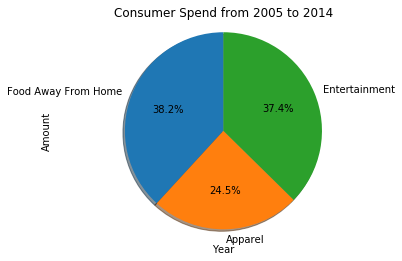

In [42]:
labels = 'Food Away From Home', 'Apparel', 'Entertainment'
sizes = [total_foodaway, total_apparel, total_ent]
explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Apparel')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Consumer Spend from 2005 to 2014')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()

In [60]:
df = df.sort_values(['seriesID','year'], ascending = True).reset_index(drop=True)
df

,year,period,periodName,value,footnotes,seriesID
0,2006,A01,Annual,1874.0,,CXUAPPARELLB1101M
1,2007,A01,Annual,1881.0,,CXUAPPARELLB1101M
2,2008,A01,Annual,1801.0,,CXUAPPARELLB1101M
3,2009,A01,Annual,1725.0,,CXUAPPARELLB1101M
4,2010,A01,Annual,1700.0,,CXUAPPARELLB1101M
5,2011,A01,Annual,1740.0,,CXUAPPARELLB1101M
6,2012,A01,Annual,1736.0,,CXUAPPARELLB1101M
7,2013,A01,Annual,1604.0,,CXUAPPARELLB1101M
8,2014,A01,Annual,1786.0,,CXUAPPARELLB1101M
9,2006,A01,Annual,2376.0,,CXUENTRTAINLB1101M


In [61]:
df["value"].pct_change()

0          NaN
1     0.003735
2    -0.042531
3    -0.042199
4    -0.014493
5     0.023529
6    -0.002299
7    -0.076037
8     0.113466
9     0.330347
10    0.135522
11    0.050778
12   -0.050088
13   -0.070182
14    0.027157
15    0.012830
16   -0.047217
17    0.099114
18   -0.012463
19   -0.009651
20    0.011244
21   -0.029281
22   -0.043528
23    0.045908
24    0.022137
25   -0.019791
26    0.061714
Name: value, dtype: float64

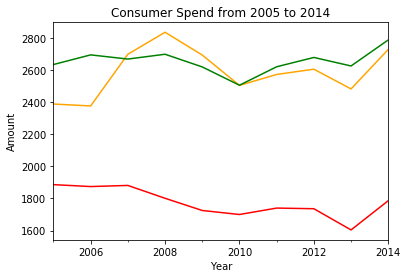

In [53]:
apparel = bls.get_series('CXUAPPARELLB1101M', 2005, 2014)
entertainment = bls.get_series('CXUENTRTAINLB1101M', 2005, 2014)
food_away = bls.get_series('CXUFOODAWAYLB1101M', 2005, 2014)


apparel.plot(kind='line', x='date',y='value', color='red')
entertainment.plot(kind='line', x='date',y='value', color='orange')
food_away.plot(kind='line', x='date',y='value', color='green')

plt.title('Consumer Spend from 2005 to 2014')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()